# Assignment 7: ANN Methodology
   ## Name: Atharv Subhekar
   ### CWID: 20015840 

In [92]:
#import preprocessing libraries
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler

#algorithm libraries
import keras
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense

#Metrics libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Data visualization libraries
import matplotlib.pyplot as plt

### Data Processing

In [93]:
# loading the dataset in pandas
df = pd.read_csv("wisc_bc_ContinuousVar.csv")
df.shape

(569, 32)

In [94]:
#Checking for missing values in the dataset
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [95]:
# storing the target labels
target = df['diagnosis']
target.replace('M', 1, inplace = True)
target.replace('B', 0, inplace = True)
target

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [96]:
#Dropping the unnecessary columns 
df = df.drop(columns = ['id','diagnosis'])
df.shape

(569, 30)

In [97]:
#Splitting the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size = 0.3)

### Feature Scaling

In [98]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Artificial Neural Network Model

In [99]:
# Define the model
model = Sequential()
model.add(Dense(units=30, activation='relu', input_dim=30))
model.add(Dense(units=5, activation = 'relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [100]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 30)                930       
                                                                 
 dense_13 (Dense)            (None, 5)                 155       
                                                                 
 dense_14 (Dense)            (None, 1)                 6         
                                                                 
Total params: 1,091
Trainable params: 1,091
Non-trainable params: 0
_________________________________________________________________


In [101]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [102]:
# Train the model
ann_model = model.fit(X_train, y_train, batch_size=10, epochs=100)

Epoch 1/100
 7/40 [====>.........................] - ETA: 0s - loss: 0.5850 - accuracy: 0.6714 

2023-04-16 22:08:26.645977: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


40/40 [==============================] - 1s 8ms/step - loss: 0.4422 - accuracy: 0.8392
Epoch 2/100
40/40 [==============================] - 0s 6ms/step - loss: 0.2297 - accuracy: 0.9372
Epoch 3/100
40/40 [==============================] - 0s 6ms/step - loss: 0.1576 - accuracy: 0.9573
Epoch 4/100
40/40 [==============================] - 0s 6ms/step - loss: 0.1191 - accuracy: 0.9648
Epoch 5/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0960 - accuracy: 0.9698
Epoch 6/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0815 - accuracy: 0.9774
Epoch 7/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0727 - accuracy: 0.9774
Epoch 8/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0646 - accuracy: 0.9824
Epoch 9/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0582 - accuracy: 0.9874
Epoch 10/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0528 - accuracy: 0.9874
Epoch 11/100
40/40 [=

40/40 [==============================] - 0s 6ms/step - loss: 6.8112e-04 - accuracy: 1.0000
Epoch 83/100
40/40 [==============================] - 0s 6ms/step - loss: 6.6393e-04 - accuracy: 1.0000
Epoch 84/100
40/40 [==============================] - 0s 6ms/step - loss: 6.3816e-04 - accuracy: 1.0000
Epoch 85/100
40/40 [==============================] - 0s 6ms/step - loss: 6.1826e-04 - accuracy: 1.0000
Epoch 86/100
40/40 [==============================] - 0s 6ms/step - loss: 6.0075e-04 - accuracy: 1.0000
Epoch 87/100
40/40 [==============================] - 0s 6ms/step - loss: 5.6311e-04 - accuracy: 1.0000
Epoch 88/100
40/40 [==============================] - 0s 6ms/step - loss: 5.4696e-04 - accuracy: 1.0000
Epoch 89/100
40/40 [==============================] - 0s 6ms/step - loss: 5.3777e-04 - accuracy: 1.0000
Epoch 90/100
40/40 [==============================] - 0s 6ms/step - loss: 5.1694e-04 - accuracy: 1.0000
Epoch 91/100
40/40 [==============================] - 0s 6ms/step - loss: 4.9

### Evaluating Decision Tree Classifier.

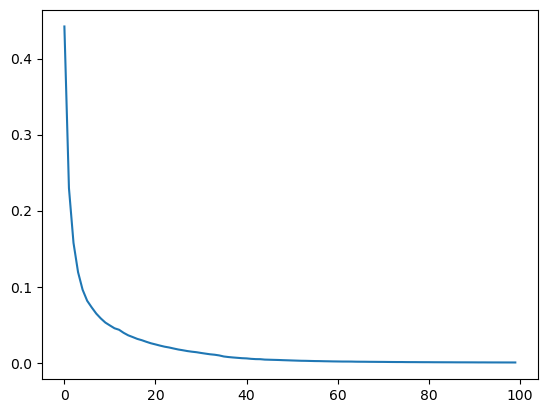

In [107]:
# Plot the loss curve (RMSProp)
tr_loss = ann_model.history['loss']
epochs = [i for i in range(len(tr_loss))]
plt.plot(epochs, tr_loss)
plt.show()

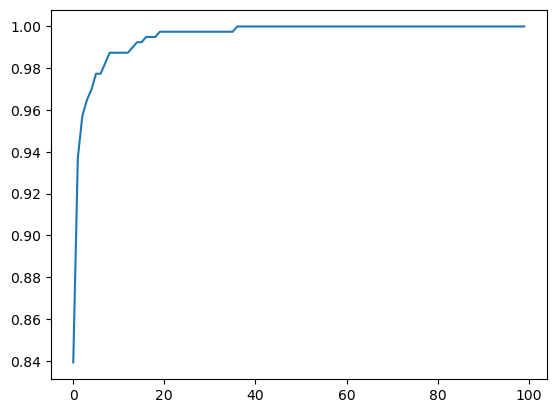

In [109]:
# Plot the loss curve (RMSProp)
tr_accuracy = ann_model.history['accuracy']
epochs = [i for i in range(len(tr_accuracy))]
plt.plot(epochs, tr_accuracy)
plt.show()

In [113]:
# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test)
print('Loss = ', loss*100)
print('Accuracy =', accuracy*100)

6/6 [==============================] - 0s 7ms/step - loss: 0.1413 - accuracy: 0.9708
Loss =  14.126567542552948
Accuracy = 97.07602262496948


In [110]:
# Predicting the labels
y_pred = model.predict(X_test).astype('int32')

6/6 [==============================] - 0s 4ms/step


2023-04-16 22:12:24.373420: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [111]:
confusion_matrix(y_pred, y_test)

array([[115,  14],
       [  0,  42]])